In [69]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import string

data = pd.read_csv("train.csv")
data.drop(columns=["id"], inplace=True)
data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [70]:
# f_00 to f_06 and f_28 - there is correlation
data_2 = pd.concat([data.iloc[:, 0:7], data["f_28"], data["target"]], axis=1)
data_2.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_28,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,67.609153,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,377.096415,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,-195.599702,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,210.826205,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,-217.211798,1


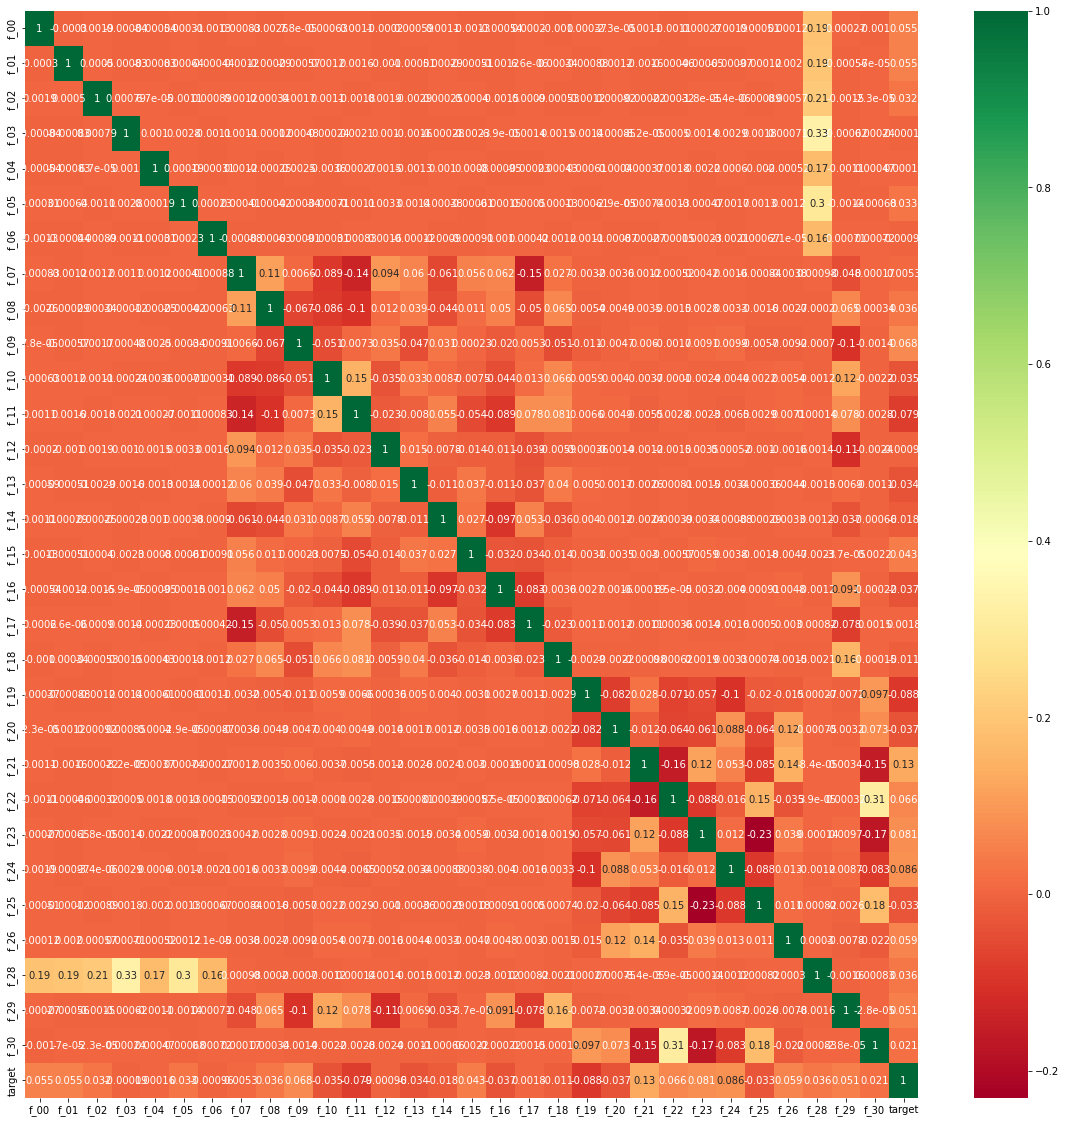

In [71]:
def correlation(data, size):
  corrmat = data.corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(size, size))
  g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#correlation(data, 20)

In [72]:
# sum of f_00 to f_06
data_2["sum"] = data_2.iloc[:, 0:7].sum(axis=1)
data_2.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_28,target,sum
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,67.609153,0,-0.505586
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,377.096415,1,-2.780472
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,-195.599702,1,0.877493
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,210.826205,1,0.535777
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,-217.211798,1,0.581208


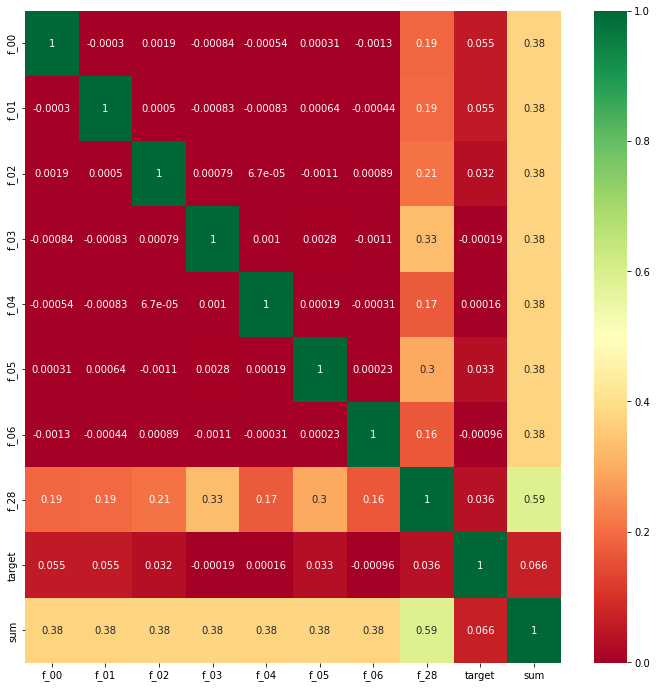

In [73]:
#correlation(data_2, 12)

In [74]:
data.isna().sum().sum()

0

In [75]:
data.iloc[:, 0:15].describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,2.177637,1.803392,2.842373,2.239778,1.514686
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,1.645953,1.537487,1.762835,1.538426,1.359213
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,14.000000,13.000000,16.000000,12.000000,14.000000


In [76]:
data.iloc[:, 15:].describe()

,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,2.101132,2.096713,1.858518,2.065131,0.308713,-0.178730,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,1.569093,1.560169,1.467675,1.564783,2.316026,2.400494,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,0.000000,0.000000,0.000000,-11.280941,-11.257917,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,-1.236061,-1.804612,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,0.330249,-0.190571,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,1.880517,1.444508,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,14.000000,15.000000,14.000000,13.000000,12.079667,11.475325,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [77]:
discrete_data = pd.concat([data.loc[:, "f_07": "f_18"], data.loc[:, "f_29":]], axis=1)


discrete_data.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,target
0,1,5,1,3,3,3,1,6,1,0,7,4,0,0,0
1,1,3,4,0,2,3,0,1,0,4,6,0,0,0,1
2,1,0,2,6,6,4,3,1,2,2,1,4,0,2,1
3,3,2,1,0,1,6,4,2,3,3,0,3,0,0,1
4,3,3,0,4,3,0,6,0,3,3,1,0,0,1,1


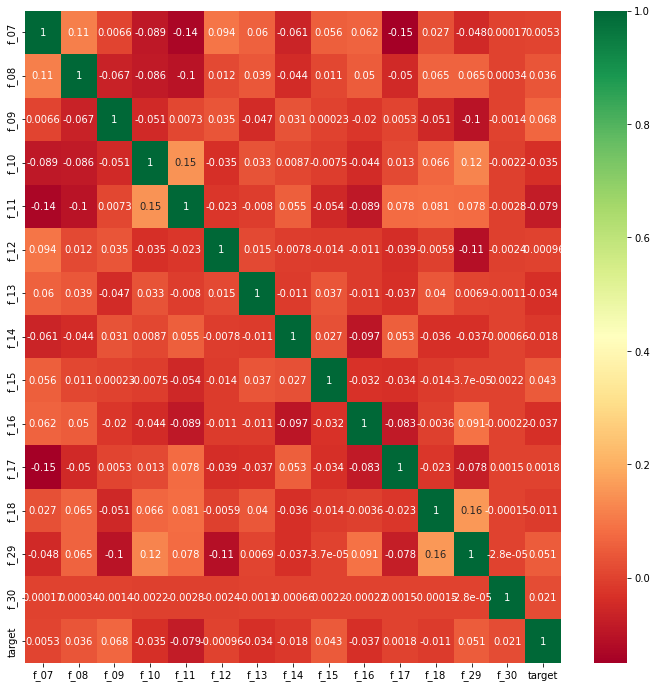

In [78]:
#correlation(discrete_data, 12)

In [79]:
data["f_27"].head()

0    ABABDADBAB
1    ACACCADCEB
2    AAAEABCKAD
3    BDBBAACBCB
4    BDBCBBCHFE
Name: f_27, dtype: object

In [80]:
data_with_chars = data.copy()

In [81]:
for letter in string.ascii_uppercase:
  data_with_chars[letter] = data_with_chars["f_27"].str.count(letter)
  if data_with_chars[letter].sum() == 0:
    data_with_chars.drop(columns=[letter], inplace=True)

data_with_chars

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K,L,M,N,O,P,Q,R,S,T
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,0,0,0,0,0,0,0,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,0,0,0,0,0,0,0,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,1,0,0,0,0,0,0,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,0,0,0,0,0,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,0,0,0,0,0,0,0,0,0,0
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,0,0,0,0,0,0,1,0,0,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,0,0,0,0,0,0,0,0,0,0
899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [82]:
data_with_chars.drop(columns="f_27", inplace=True)

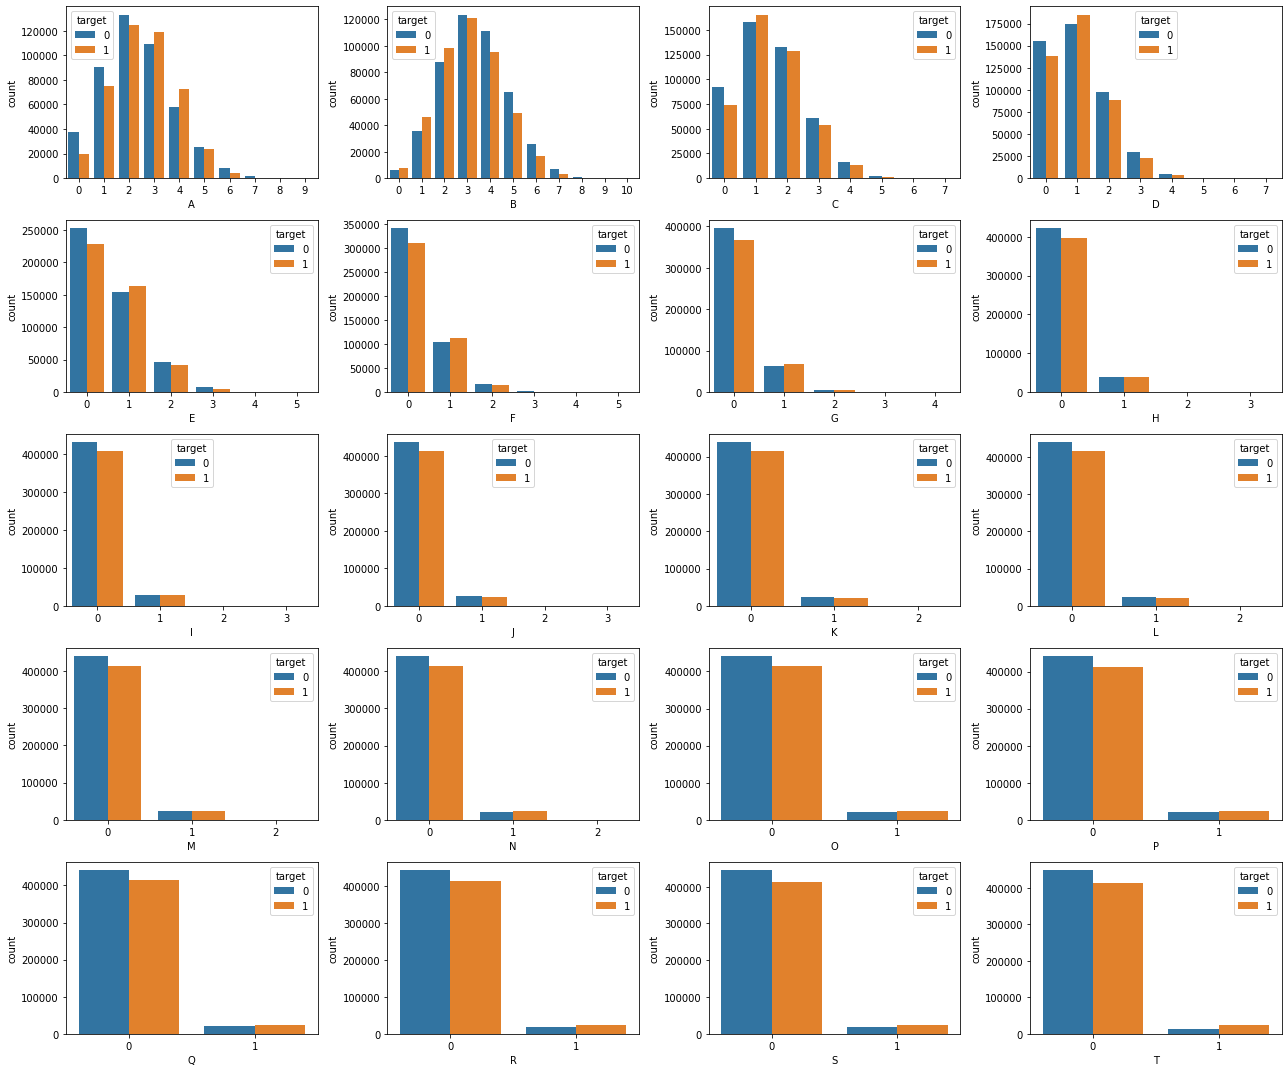

In [83]:
plt.subplots(figsize=(18,15))

for i, col in enumerate(data_with_chars.loc[:, "A": "T"]):
  plt.subplot(5, 4, i+1)
  sns.countplot(x=data_with_chars[col], hue=data_with_chars['target'])
  plt.tight_layout()

In [86]:
# distribution of letters at indexes

for i in range(10):
  print(f"Position {i}")
  group = data.groupby(data["f_27"].str.get(i))
  temp = pd.DataFrame({'size': group.size(), 'probability': group.target.mean().round(2)})
  print(temp)
  print()


Position 0
        size  probability
f_27                     
A     451207         0.54
B     448793         0.44

Position 1
        size  probability
f_27                     
A     144762         0.58
B     245160         0.48
C     225931         0.49
D     149579         0.45
E      78807         0.43
F      35487         0.42
G      13713         0.41
H       4647         0.40
I       1361         0.40
J        410         0.38
K        113         0.39
L         25         0.28
M          3         0.67
N          2         1.00

Position 2
        size  probability
f_27                     
A     297840         0.53
B     602160         0.46

Position 3
        size  probability
f_27                     
A     160839         0.57
B     237218         0.48
C     210015         0.48
D     143633         0.45
E      81662         0.43
F      39504         0.44
G      17121         0.45
H       6473         0.47
I       2379         0.48
J        772         0.51
K        254     